In [6]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Glucose    BMI  Outcome
0      141  33.02        0
1       83  30.20        0
2      128  27.16        0
3      112  35.16        1
4       71  27.22        0


* Our goal is to predict whether the person has diabetes or not using BMI and Glucose level.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  500 non-null    int64  
 1   BMI      500 non-null    float64
 2   Outcome  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB
None


In [3]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [5]:
X = df.iloc[:,:-1].to_numpy()
#select all rows except target variable
Y = df.iloc[:,-1].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

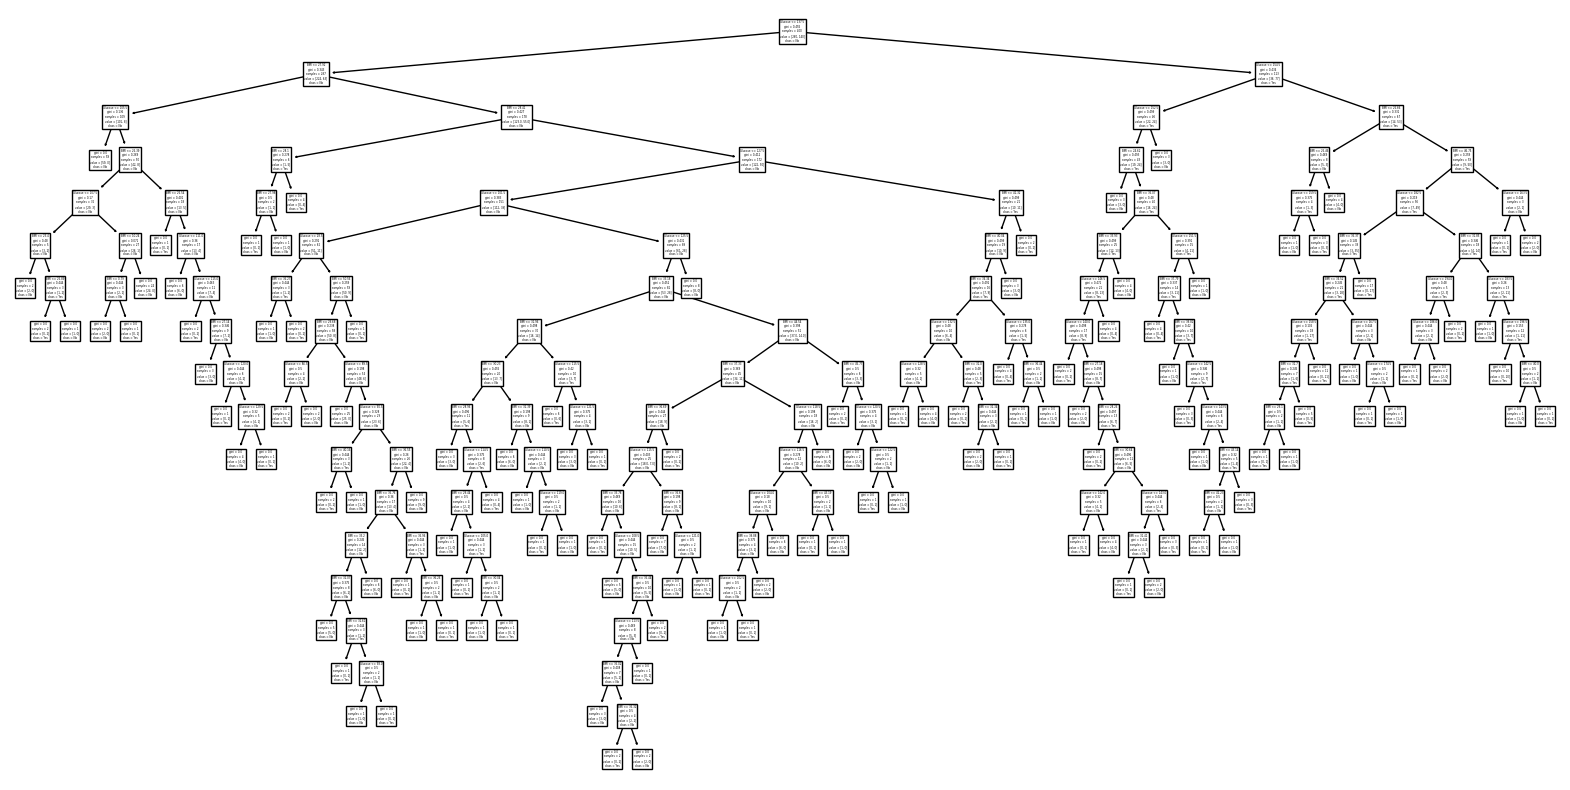

In [16]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No','Yes'])
plt.show()

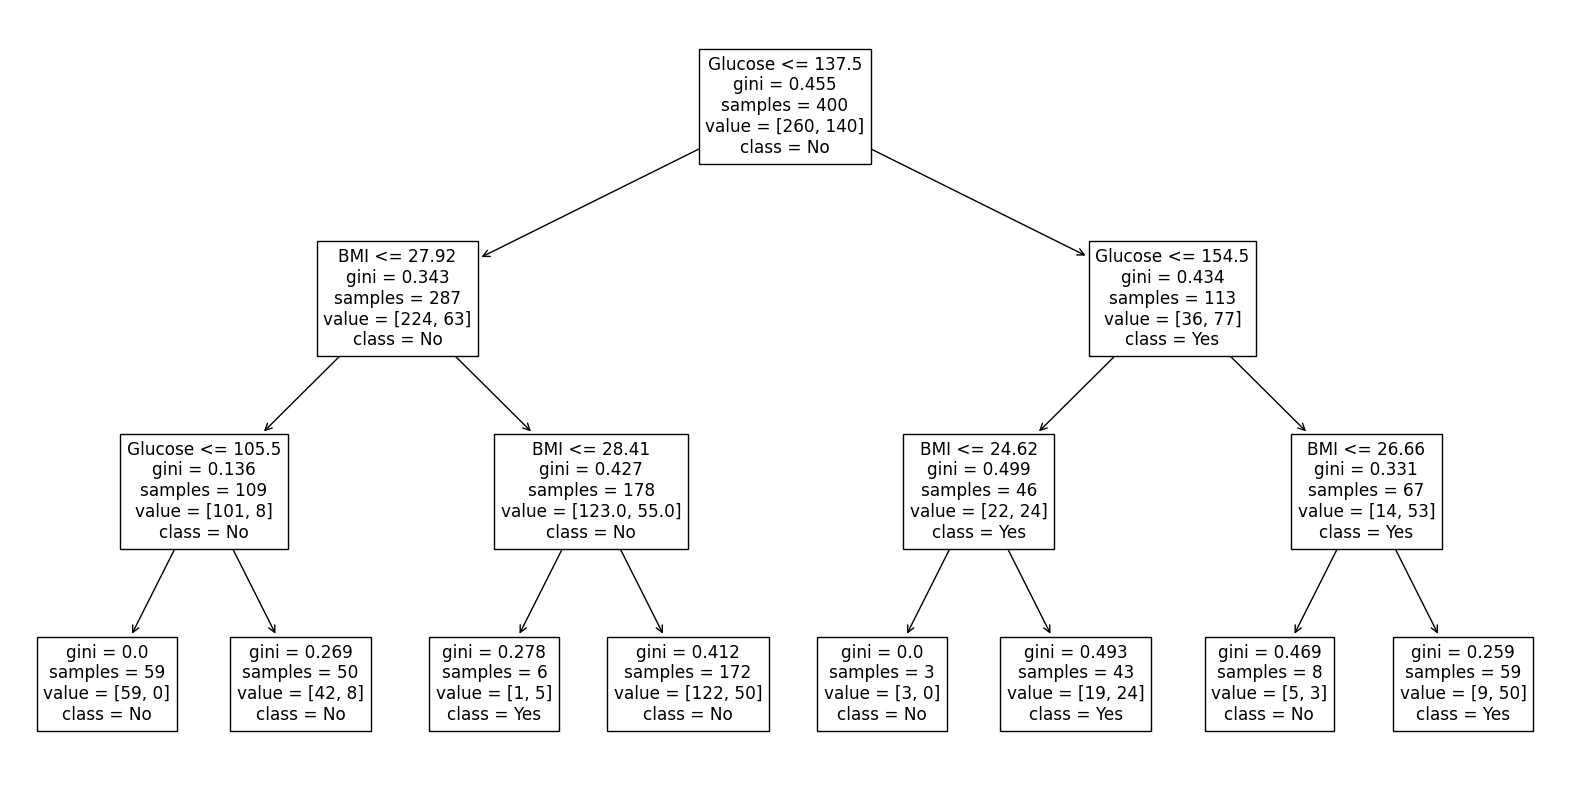

In [17]:
clf.set_params(max_depth = 3)
clf.fit(X_train, Y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No','Yes'])
plt.show()

In [18]:
clf.predict([[90, 20], [200, 30]])

array([0, 1], dtype=int64)

In [19]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
print(accuracy)

0.7125


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=0)
clf_rf.fit(X_train, Y_train)
scores = cross_val_score(clf_rf, X_train, Y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
print(accuracy)

0.725


## Support Vector Machine(SVM)

### Binary Classification
_____________________

* A task of classifying instances into two classes.
* For binary classification SVM tries to find out a boundary(hyperplane) that seperates the instances into two classes.
* SVM vector works by finding a hyperplane that maximizes the distance between the plane and the closest data points.

### Non Linear SVM model
____________________

* If the data was more convoluted and a straight line could not seperate the two classes well we need to use a non linear SVM.
* Here we use polynomial regression instead of linear regression.
* To seperate data that is not linear seperable,map the data to a higher dimensional space.
* In the figure the dataset on top(x) is not seperable by linear line we can map it to a 2d space by adding a new dimension x^2.
* Example: x=-3 and x^2=9 can be mapped

### Kernel trick
____________

* To use kernel trick,pass a kernel hyper parameter to the SVM model when instantiating it.
* The kernels available in sklearn are 
    1. linear 
    2. poly
    3. rbf(default)
    4. sigmoid
    5. precomputed

### Multiclass Classification
_________________________

* multiple classes we can use any one of the following curistic methods.
    1. OvR(One-vs-Rest)
    2. OvO(One-vs-One)

#### One-vs-Rest
___________

* We need to classify our dataset into three classes class1,class2,class3
* OvR splits the problem into binary classification problem as follows
            1. class1 vs not class1(class2 and class3 are combined to not class1)
            2. class2 vs not class2
            3. class3 vs not class3
* The binary classifier is trained on each problem and decision score is generated for each classifier.
* The output of the classifier with the highest score is selected.

#### One-vs-One
__________

* This method trains the binary classifier for each pair of classes and selects the class with the most votes.
* class1 vs class2     
* class1 vs class3
* class2 vs class3

#### OvR and OvO
* sklearn provides two classes 
    1. OneVsOneClassifier
    2. OneVsRestClassifier